In [32]:
# Project 1
# molecular chemical complexity measures how complex a molecule is when fragmented 
#it is used as an indicator for chemical process complexity
# exploring relationship between complexity molecular weight and polararea, using simple statistics and graphs

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg 

In [33]:
df = pd.read_csv('chemical_data.csv',index_col=4)

In [34]:
#https://clas.sa.ucsb.edu/staff/Resource%20Folder/Chem109ABC/Acid,%20Base%20Strength/Table%20of%20Acids%20w%20Kas%20and%20pKas.pdf
#https://en.wikipedia.org/wiki/Ternary_plot

In [35]:
df2 = df[['mw','polararea','complexity','xlogp','heavycnt','hbondacc','rotbonds']]

/Users/mirandalu/miniconda3/envs/che155/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



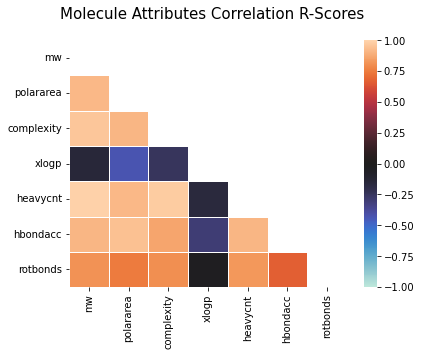

In [36]:
#explore general linear relationship between different attributes in the dataset by examine the R-score

# The following code source code credit are given to:
#https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python#2D%20linear%20regression%20with%20scikit-learn

import seaborn as sns

corr = df2.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
#mask upper triangle indecies
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom  colormap with UCD color
# didn't turn out as expected...
colors = ["#1D4776", "#FFECB2"]
cmap = sns.set_palette(sns.color_palette(colors))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Molecule Attributes Correlation R-Scores', fontsize=15)
#ax.text(0.77, 0.2, fontsize=13, ha='center', va='center', color='grey', alpha=0.5)

plt.savefig('Molecule Attributes.png',bbox_inches='tight')
fig.tight_layout()


/Users/mirandalu/miniconda3/envs/che155/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



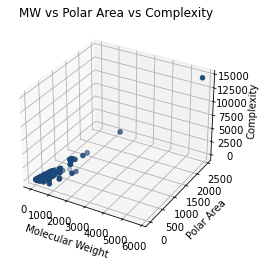

In [37]:
#from the above graph, it's notacible that complexity may have strong linear relationship withmolecular weight, polar area
#plot a separate scatter plot to take a closer look

ucd_colors = ["#1D4776", "#FFECB2"]

fig = plt.figure()
ax = fig.add_subplot(projection='3d',title = 'MW vs Polar Area vs Complexity')
ax.scatter(df['mw'],df['polararea'],df['complexity'], c = "#1D4776")
ax.grid(visible = None, witch = 'both', color = "#FFECB2")
ax.set_xlabel('Molecular Weight')
ax.set_ylabel('Polar Area')
ax.set_zlabel('Complexity')

fig.show()
plt.savefig('MW_vs_PolarArea_vs_Complexity.png',bbox_inches='tight')


In [77]:
df2[['mw','polararea','complexity']].describe().round(2)

,mw,polararea,complexity
count,952.00,952.00,952.00
mean,386.74,124.80,564.00
std,393.85,148.05,931.94
min,12.01,0.00,0.00
25%,150.20,42.62,65.52
50%,257.27,80.30,225.00
75%,441.95,147.50,598.25
max,5794.00,2450.00,14600.00


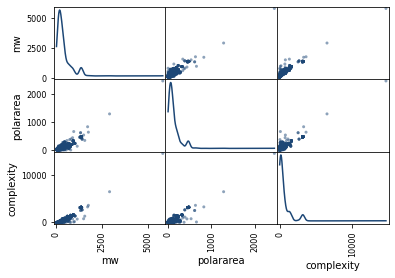

In [38]:
# it's really hard to tell from the graph above... and my plotly just won't show the graph
# so plotted each one separately in pandas

pd.plotting.scatter_matrix(df.loc[:,['mw','polararea','complexity']],diagonal='kde',c = "#1D4776")
df.groupby(['mw','complexity']).describe()
pg.pairwise_corr(df,['mw','polararea','complexity'],method='pearson')

plt.savefig('scatter_matrix.png',bbox_inches='tight')


In [39]:
# and ran a multiple linear regression to get the coefficients and intercept
# R-score is close to one, complexity is is very closely linearly related to MW and Pl

from sklearn import linear_model

regr = linear_model.LinearRegression()
x = df[['mw','polararea']]
y = df['complexity']
graph = regr.fit(x,y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('R-Score:',graph.score(x, y))

Intercept: 
 -298.9146032036351
Coefficients: 
 [1.80603667 1.3175717 ]
R-Score: 0.9198157939789254


In [40]:
#normalize the 3 attributes, and attempt to use plotly express to make a ternery graph
# not sure why the graph just won't display

from sklearn import preprocessing

norm_mw = preprocessing.normalize([np.array(df['mw'])])
norm_polararea = preprocessing.normalize([np.array(df['polararea'])]) 
norm_complexity = preprocessing.normalize([np.array(df['complexity'])]) 

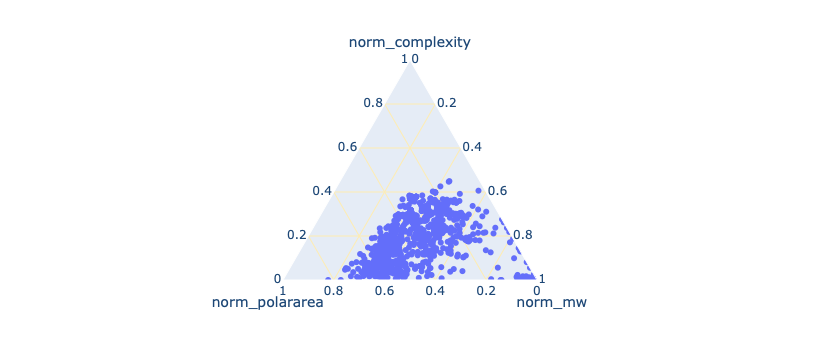

In [72]:
import plotly.express as px 

df3 = [[norm_mw, norm_polararea, norm_complexity]]
fig = px.scatter_ternary(df3, 
                         a = norm_complexity.reshape(-1,), 
                         b = norm_polararea.reshape(-1,), 
                         c = norm_mw.reshape(-1,))
fig.update_ternaries(aaxis_color="#1D4776",baxis_color="#1D4776",caxis_color="#1D4776",
                     aaxis_gridcolor="#FFECB2",baxis_gridcolor="#FFECB2",caxis_gridcolor="#FFECB2",
                    aaxis_title="norm_complexity",baxis_title="norm_polararea",caxis_title="norm_mw")

fig.show()

#the relationship of complexity is likely to be stronger with low molecular weight and low polararea
#relationship for more complex molecules are not likely to be linear